# ЧИСЛЕННОЕ РЕШЕНИЕ

In [44]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации

%matplotlib inline
plt.style.use('seaborn') # установка стиля matplotlib
# pd.set_option('display.float_format', '{:.2f}'.format)

In [45]:
from sklearn import linear_model, metrics, set_config, preprocessing
set_config(transform_output='pandas')

[Данные теперь находятся здесь](https://lms.skillfactory.ru/assets/courseware/v1/d4accdce7a25600298819f8e28e8d593/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/housing.csv)

In [46]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
features = column_names[:-1]
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Обучим с помощью градиентного спуска линейную регрессию 

на одном факторе — LSTAT (процент низкостатусного населения) 

— и сравним результат с полученным ранее результатом МНК.

In [47]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # вектор правильных ответов

In [48]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [49]:
print(f'w0: {sgd_lr_lstat.intercept_}') # свободный член w0
print(f'w1: {sgd_lr_lstat.coef_}') # остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


Давайте с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

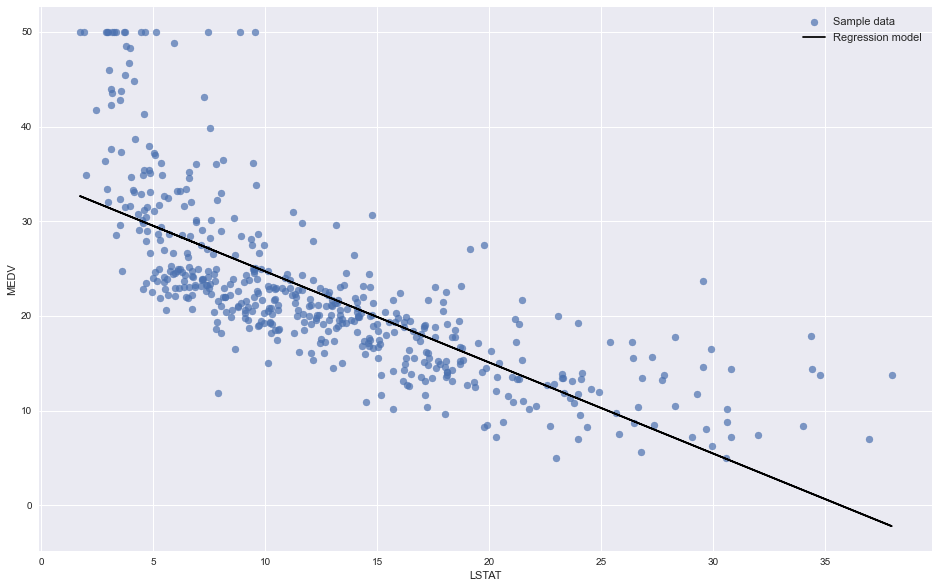

In [50]:
# функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(16, 10)) # фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) # название оси абсцисс
    ax.set_ylabel(ylabel) # название оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда
    
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)

# Строим визуализацию
plot_regression_2d(X.to_numpy(), y, y_predict)

In [51]:
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.542


Итоговый  для линейной регрессии, обученной с помощью градиентного спуска, составил 0.542. 

Напомним, для той же модели, обученной с помощью МНК, метрика была равна 0.544. 

Тоесть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, 

ниже примерно на 0.002. Очевидно, в реальных задачах такая разница не имеет значения. 

# Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. 

Как и раньше составим полную матрицу наблюдений  из всех факторов, которые нам даны. 

Обучим модель и выведем значения коэффициентов в виде DataFrame:

In [52]:
# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})

# Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


Все коэффициенты имеют запредельные значения (9-11 степени числа 10).
 
Это типичная картина расходящегося градиентного спуска: алгоритм не достиг 
точки минимума по каким-то причинам. 

Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [53]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: -10590303862129979358707712.000


R отрицательный. Да ещё какой! Напомним, отрицательный   говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели SGD не справился с поиском 14 параметров (свободный член + 13 коэффициентов при факторах)?

Ответ очень простой — отсутствие масштабирования. 

Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно 

масштабировать данные с помощью нормализации или стандартизации. 

Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

In [54]:
# Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()

# Производим стандартизацию
X_scaled = scaler.fit_transform(X)

# Составляем DataFrame из результата
# X_scaled = pd.DataFrame(X_scaled, columns=features) # в последних версиях sklearn можно настроить вывод в виде pandas
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# Попытка №2. Обучим модель и составим таблицу из её параметров:

In [55]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
# Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})

# Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [56]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X_scaled)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.740


Найдите в документации параметр, отвечающий на критерий остановки (по умолчанию он равен 0.001).

Обучите SGDRegressor на датасете о домах в Бостоне с параметром остановки, равным 0.1, и random_state = 42. 

Остальные параметры оставьте по умолчанию.

Рассчитайте коэффициент детерминации . 

Ответ округлите до третьего знака после точки-разделителя. 

Сделайте вывод по полученным результатам.

In [57]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42, tol=0.1)

# Обучаем модель — ищем параметры по методу SGD
# Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)

SGDRegressor(random_state=42, tol=0.1)

In [58]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X_scaled)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.735


У класса SGDRegressor, помимо random_state, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в документации. А мы приведём несколько самых важных:

loss — функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.
max_iter — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
learning_rate — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее: .
Есть ещё несколько режимов управления, о которых вы можете прочитать в документации.

Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "constant".

eta0 — начальное значение темпа обучения . Значение по умолчанию — 0.01.
Если параметр learning_rate="constant", то значение этого параметра будет темпом обучения на протяжении всех итераций.

power_t — значение мощности уменьшения  в формуле  . Значение по умолчанию — 0.25.

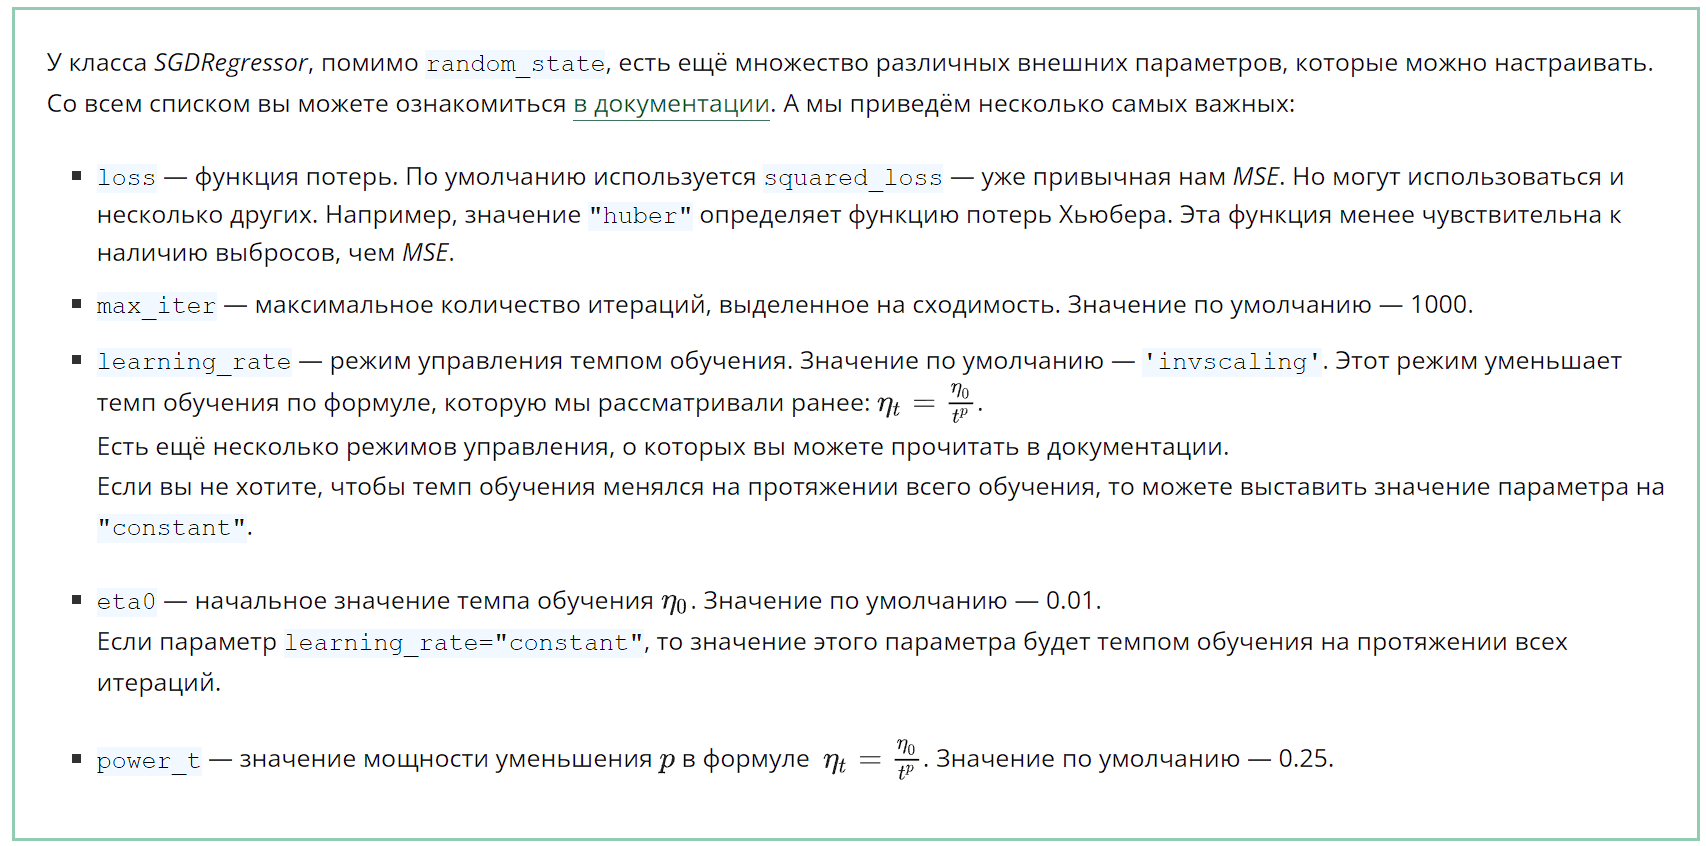